In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('fraud_dataset.csv')
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 4 columns):
transaction_id    8793 non-null int64
duration          8793 non-null float64
day               8793 non-null object
fraud             8793 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 214.8+ KB


In [4]:
df.describe()

,transaction_id,duration
count,8793.000000,8793.000000
mean,55243.384510,29.704626
std,21792.120147,7.464452
min,17301.000000,0.215113
25%,36454.000000,25.211787
50%,55420.000000,29.923160
75%,74131.000000,34.532567
max,92828.000000,60.412763


In [5]:
df[['no_fraud','is_fraud']] = pd.get_dummies(df['fraud'])

In [6]:
df[['weekday','weekend']] = pd.get_dummies(df['day'])

In [7]:
df.head()

,transaction_id,duration,day,fraud,no_fraud,is_fraud,weekday,weekend
0,28891,21.302600,weekend,False,1,0,0,1
1,61629,22.932765,weekend,False,1,0,0,1
2,53707,32.694992,weekday,False,1,0,1,0
3,47812,32.784252,weekend,False,1,0,0,1
4,43455,17.756828,weekend,False,1,0,0,1


In [8]:
df = df.drop(columns=['no_fraud','weekend'])

In [9]:
df.head()

,transaction_id,duration,day,fraud,is_fraud,weekday
0,28891,21.302600,weekend,False,0,0
1,61629,22.932765,weekend,False,0,0
2,53707,32.694992,weekday,False,0,1
3,47812,32.784252,weekend,False,0,0
4,43455,17.756828,weekend,False,0,0


In [10]:
df.describe()

,transaction_id,duration,is_fraud,weekday
count,8793.000000,8793.000000,8793.000000,8793.000000
mean,55243.384510,29.704626,0.012169,0.345275
std,21792.120147,7.464452,0.109645,0.475485
min,17301.000000,0.215113,0.000000,0.000000
25%,36454.000000,25.211787,0.000000,0.000000
50%,55420.000000,29.923160,0.000000,0.000000
75%,74131.000000,34.532567,0.000000,1.000000
max,92828.000000,60.412763,1.000000,1.000000


In [11]:
df[df['is_fraud'] == 0].describe()

,transaction_id,duration,is_fraud,weekday
count,8686.000000,8686.000000,8686.0,8686.000000
mean,55262.229219,30.013583,0.0,0.340433
std,21798.901508,6.966272,0.0,0.473882
min,17301.000000,4.965216,0.0,0.000000
25%,36507.000000,25.394257,0.0,0.000000
50%,55464.000000,30.027582,0.0,0.000000
75%,74199.750000,34.613246,0.0,1.000000
max,92828.000000,60.412763,0.0,1.000000


In [12]:
df['intercept'] = 1

In [13]:
logit_m = sms.Logit(df['is_fraud'], df[['intercept', 'duration','weekday']])
results = logit_m.fit()
results.summary()

C:\Users\vilij\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\vilij\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: inf
         Iterations 16


C:\Users\vilij\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:                 8793
Model:                          Logit   Df Residuals:                     8790
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Jun 2019   Pseudo R-squ.:                     inf
Time:                        14:20:38   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8709      1.944      5.078      0.000       6.061      13.681
duration      -1.4637      0.290     -5.039      0.000      -2.033      -0.894
weekday        2.5465      0.904      2.816      0.005       0.774       4.319
==============================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

posx and posy should be finite values


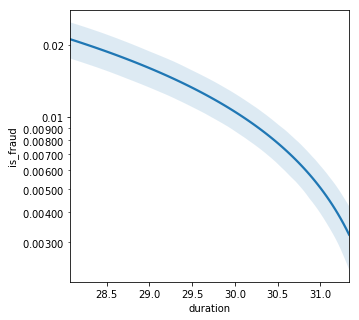

In [14]:
f, ax = plt.subplots(figsize=(5,5))
ax.set(xscale="linear", yscale="logit")
sb.regplot("duration", "is_fraud", df, ax=ax); 

In [15]:
# interpreting coefficients
np.exp(-1.4637), np.exp(2.5465)

(0.2313785882117941, 12.762357271496972)

*On weekeday, fraud is 12.76 times as likely than on weekends, holding all else constant.*

*For every unit increase in duration, fraud is 0.23 times as likely, holding all else constant.*

In [16]:
# inverting negative coefficient -- implies for every unit decrease in duration, all else being equal, 
# the probability of fraud will incrase below times 

1/np.exp(-1.4637)

4.321921089278333

*For every unit decrease in duration, fraud is 4.32 times as likely, holding all else constant.*